In [40]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dataset = load_diabetes()

In [43]:
dataset['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [44]:
# Independent and Dependent Features
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = dataset['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [47]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [48]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

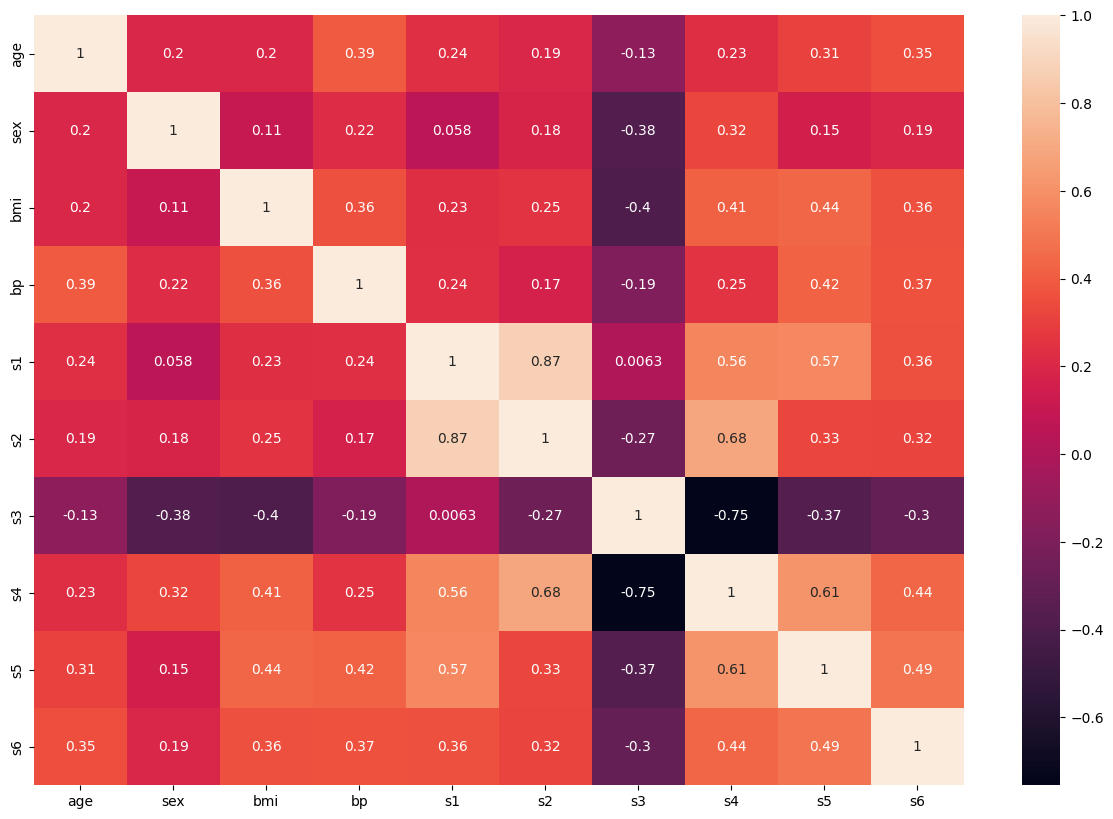

In [49]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [50]:
## Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyper Parameter Tunning

In [51]:
params = {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
           'splitter': ["best", "random"],
          'max_depth': [1,2,3,4,5, 10, 15, 20, 25],
          "max_features": ['auto', 'sqrt', 'log2']
         }

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid.fit(X_train, y_train)

In [57]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [59]:
grid.best_score_

-3965.976708560692

In [61]:
y_pred = grid.predict(X_test)

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(score)
print(mae)
print(mse)

0.27203240012971464
53.01244860087432
4606.339539818158


In [63]:
selectmodel = DecisionTreeRegressor(criterion='squared_error', max_depth=5, max_features='sqrt', splitter='random')

In [64]:
selectmodel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', splitter='random')

[Text(0.48404255319148937, 0.9166666666666666, 'x[0] <= 0.008\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.21808510638297873, 0.75, 'x[8] <= -0.033\nsquared_error = 5144.044\nsamples = 160\nvalue = 135.156'),
 Text(0.10638297872340426, 0.5833333333333334, 'x[3] <= 0.046\nsquared_error = 2410.89\nsamples = 51\nvalue = 98.176'),
 Text(0.0851063829787234, 0.4166666666666667, 'x[8] <= -0.044\nsquared_error = 2175.908\nsamples = 50\nvalue = 95.82'),
 Text(0.0425531914893617, 0.25, 'x[8] <= -0.101\nsquared_error = 2053.402\nsamples = 38\nvalue = 92.421'),
 Text(0.02127659574468085, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 201.0'),
 Text(0.06382978723404255, 0.08333333333333333, 'squared_error = 1781.655\nsamples = 37\nvalue = 89.486'),
 Text(0.1276595744680851, 0.25, 'x[8] <= -0.037\nsquared_error = 2411.41\nsamples = 12\nvalue = 106.583'),
 Text(0.10638297872340426, 0.08333333333333333, 'squared_error = 2800.025\nsamples = 9\nvalue = 114.444'),

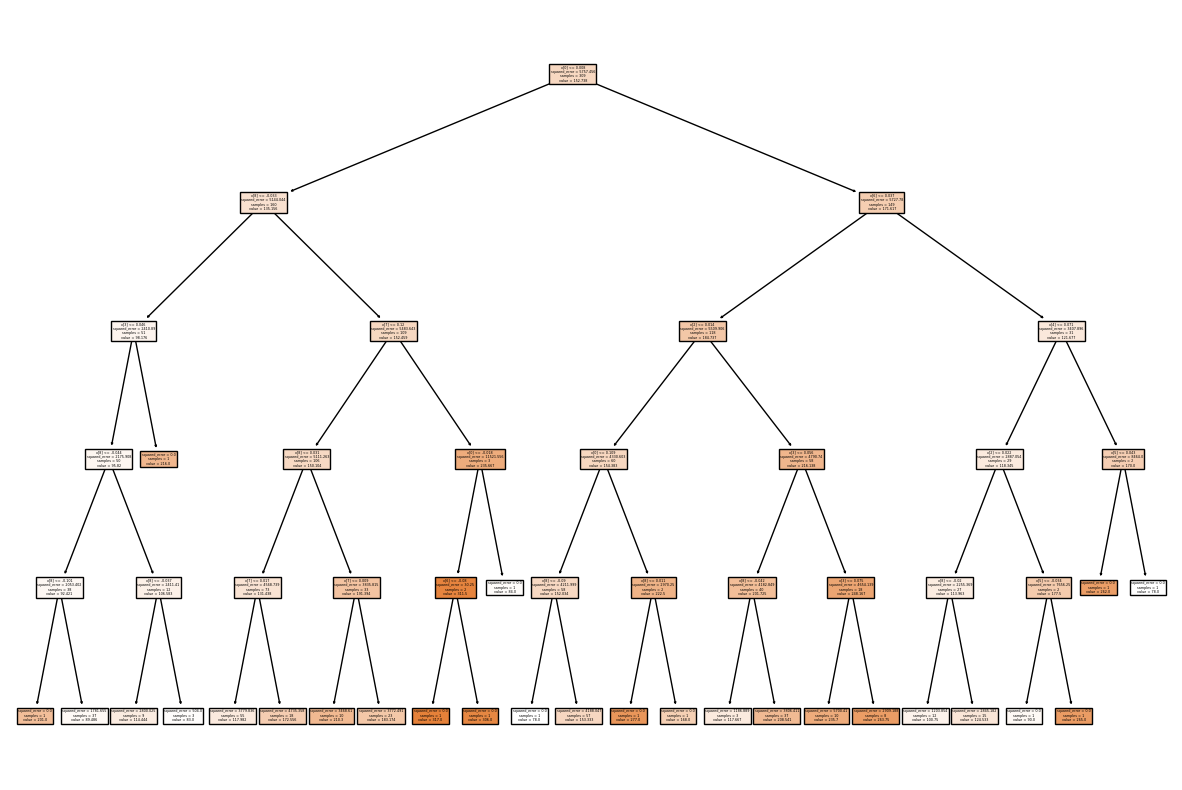

In [65]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel, filled=True)